In [80]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'IDR'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video


In [81]:
type(data)

dict

In [95]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [83]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.IDR.price,quote.IDR.volume_24h,quote.IDR.volume_change_24h,quote.IDR.percent_change_1h,quote.IDR.percent_change_24h,quote.IDR.percent_change_7d,quote.IDR.percent_change_30d,quote.IDR.percent_change_60d,quote.IDR.percent_change_90d,quote.IDR.market_cap,quote.IDR.market_cap_dominance,quote.IDR.fully_diluted_market_cap,quote.IDR.tvl,quote.IDR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9777,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19178037.00000,19178037.00000,NaN,1,NaN,NaN,None,2022-10-13T16:41:00.000Z,292247381.29482,589643640781998.62500,42.72050,0.14632,-1.29723,-6.69106,-8.65590,-22.36174,-8.27611,5604731091625211.00000,40.12060,6137195007191272.00000,None,2022-10-13T16:42:25.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 23:42:48.982203
1,1027,Ethereum,ETH,ethereum,6138,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122779673.49900,122779673.49900,NaN,2,NaN,NaN,None,2022-10-13T16:41:00.000Z,19382096.68275,243373670012950.28125,89.50210,0.13001,-3.39327,-8.85395,-21.32140,-36.21192,4.20463,2379727502434465.00000,17.02670,2379727502434406.00000,None,2022-10-13T16:42:25.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 23:42:48.982203
2,825,Tether,USDT,tether,40769,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68421859091.16577,70146125804.35068,NaN,3,NaN,NaN,None,2022-10-13T16:41:00.000Z,15382.42436,824276852673899.75000,53.48790,-0.16968,-0.80682,-1.44235,-0.00396,-0.02414,0.03738,1052494072327905.87500,7.53050,1079017474627162.12500,None,2022-10-13T16:42:25.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-13 23:42:48.982203
3,3408,USD Coin,USDC,usd-coin,6493,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,45695759439.32406,45695759439.32406,NaN,4,NaN,NaN,None,2022-10-13T16:41:00.000Z,15384.83492,67789497546374.80469,42.54060,-0.17906,-0.79234,-1.41329,0.01537,0.03085,0.02701,703021715673803.37500,5.03250,703021715673774.50000,None,2022-10-13T16:42:25.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-13 23:42:48.982203
4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-10-13T16:41:00.000Z,4124166.45727,15480082641220.84180,78.23000,0.18590,-1.50113,-10.32756,-5.23294,-16.60206,13.11096,665381720495159.00000,4.76070,824833291454021.00000,None,2022-10-13T16:42:25.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 23:42:48.982203
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49964184162.00000,99989267435.00000,NaN,6,NaN,NaN,None,2022-10-13T16:41:00.000Z,7368.01390,40347026813442.47656,60.70370,0.56498,-3.20779,-5.01901,41.24935,25.27270,45.58595,368136803160966.06250,2.63690,736801389505976.12500,None,2022-10-13T16:42:25.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 23:42:48.982203
6,4687,Binance USD,BUSD,binance-usd,5265,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,None,2022-10-13T16:41:00.000Z,15378.76725,116231513977013.45312,33.00340,-0.22071,-0.87072,-1.68912,-0.01971,-0.00348,0.08304,332613525266327.37500,2.38210,332613525266402.75000,None,2022-10-13T16:42:25.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-13 23:42:48.982203
7,2010,Cardano,ADA,cardano,580,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34279051075.85400,35026102954.65500,NaN,8,NaN,NaN,None,2022-10-13T16:41:00.000Z,5819.91507,15969599390544.35742,147.74990,0.86924,-3.93648,-13.24088

In [84]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'IDR'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.Timestamp('now')
    df = df.append(df2)


#     # if want to create a csv and append data to it
#     df = pd.json_normalize(data['data'])
#     df['timestamp'] = pd.to_datetime('now')
#     df

    #if not os.path.isfile(r'E:\Eric Learning\Crypto Analysis Python\API.csv'):
        #df.to_csv(r'E:\Eric Learning\Crypto Analysis Python\API.csv'', header='column_names')
    #else:
        #df.to_csv(r'E:\Eric Learning\Crypto Analysis Python\API.csv', mode='a', header=False)
        

In [85]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2956\490470079.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\DELL\AppData\Local\Temp\ipykernel_2956\490470079.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\DELL\AppData\Local\Temp\ipykernel_2956\490470079.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\DELL\AppData\Local\Temp\ipykernel_2956\490470079.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [100]:
df_read_api = pd.read_csv(r'E:\Eric Learning\Crypto Analysis Python\API.csv')
df_read_api

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9770,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19176800.00000,19176800.00000,NaN,1,NaN,NaN,NaN,2022-10-12T04:22:00.000Z,19103.01379,27189430939.85521,-6.89720,0.13181,0.28016,-5.42355,-11.81324,-22.79415,-5.21785,366334674787.22479,39.74550,401163289523.37000,NaN,2022-10-12T04:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-12 04:22:34.745356
1,1,1027,Ethereum,ETH,ethereum,6135,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122758189.49900,122758189.49900,NaN,2,NaN,NaN,NaN,2022-10-12T04:21:00.000Z,1290.45153,8286604715.47629,-14.76220,0.37200,0.92795,-4.70432,-25.23440,-35.09754,16.17645,158413494041.06613,17.19270,158413494041.07001,NaN,2022-10-12T04:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-12 04:22:34.745356
2,2,825,Tether,USDT,tether,40681,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,68421859091.17427,70146125804.35918,NaN,3,NaN,NaN,NaN,2022-10-12T04:21:00.000Z,1.00000,35443665974.49876,-13.74040,0.00190,0.00168,-0.02643,-0.02413,-0.04623,0.05284,68421559173.95518,7.42810,70145818329.07001,NaN,2022-10-12T04:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-12 04:22:34.745356
3,3,3408,USD Coin,USDC,usd-coin,6485,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,45953882867.41015,45953882867.41015,NaN,4,NaN,NaN,NaN,2022-10-12T04:21:00.000Z,1.00009,3365297701.43641,-3.93150,0.00701,0.01479,0.01082,0.02087,0.02213,0.00212,45957790783.91564,4.98620,45957790783.92000,NaN,2022-10-12T04:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-12 04:22:34.745356
4,4,1839,BNB,BNB,bnb,1123,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-10-12T04:21:00.000Z,272.38685,582978066.48786,-16.16900,0.16219,0.79881,-7.66189,-6.97838,-16.86875,17.21239,43946148974.37082,4.76790,54477370791.43000,NaN,2022-10-12T04:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-12 04:22:34.745356
5,5,52,XRP,XRP,xrp,826,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,49964184162.00000,99989267435.00000,NaN,6,NaN,NaN,NaN,2022-10-12T04:21:00.000Z,0.48858,2069267566.53808,-18.71320,0.62672,-1.19679,2.59532,39.37915,28.26489,51.82151,24411621521.29488,2.64850,48858241019.50000,NaN,2022-10-12T04:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-12 04:22:34.745356
6,6,4687,Binance USD,BUSD,binance-usd,5256,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,NaN,2022-10-12T04:21:00.000Z,0.99998,5938924399.50300,-12.69810,-0.04426,0.01032,-0.05496,0.00438,0.02849,0.01494,21627647715.73826,2.34860,21627647715.74000,NaN,2022-10-12T04:21:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-12 04:22:34.745356
7,7,2010,Cardano,ADA,cardano,578,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34279085958.97800,35007351299.34100,NaN,8,NaN,NaN,NaN,2022-10-12T04:21:00.000Z,0.39389,487015758.70008,-29.23940,0.24906,-0.70239,-9.04149,-21.73701,-27.36025,-9.50774,13502257193.15599,1.46490,17725139299.78000,NaN,2022-10-12T04:21:00.000Z,NaN,NaN,NaN,NaN,

In [96]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.IDR.price,quote.IDR.volume_24h,quote.IDR.volume_change_24h,quote.IDR.percent_change_1h,quote.IDR.percent_change_24h,quote.IDR.percent_change_7d,quote.IDR.percent_change_30d,quote.IDR.percent_change_60d,quote.IDR.percent_change_90d,quote.IDR.market_cap,quote.IDR.market_cap_dominance,quote.IDR.fully_diluted_market_cap,quote.IDR.tvl,quote.IDR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9777,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19178037.00000,19178037.00000,NaN,1,NaN,NaN,None,2022-10-13T16:41:00.000Z,292247381.29482,589643640781998.62500,42.72050,0.14632,-1.29723,-6.69106,-8.65590,-22.36174,-8.27611,5604731091625211.00000,40.12060,6137195007191272.00000,None,2022-10-13T16:42:25.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 23:42:48.982203
1,1027,Ethereum,ETH,ethereum,6138,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122779673.49900,122779673.49900,NaN,2,NaN,NaN,None,2022-10-13T16:41:00.000Z,19382096.68275,243373670012950.28125,89.50210,0.13001,-3.39327,-8.85395,-21.32140,-36.21192,4.20463,2379727502434465.00000,17.02670,2379727502434406.00000,None,2022-10-13T16:42:25.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 23:42:48.982203
2,825,Tether,USDT,tether,40769,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68421859091.16577,70146125804.35068,NaN,3,NaN,NaN,None,2022-10-13T16:41:00.000Z,15382.42436,824276852673899.75000,53.48790,-0.16968,-0.80682,-1.44235,-0.00396,-0.02414,0.03738,1052494072327905.87500,7.53050,1079017474627162.12500,None,2022-10-13T16:42:25.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-13 23:42:48.982203
3,3408,USD Coin,USDC,usd-coin,6493,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,45695759439.32406,45695759439.32406,NaN,4,NaN,NaN,None,2022-10-13T16:41:00.000Z,15384.83492,67789497546374.80469,42.54060,-0.17906,-0.79234,-1.41329,0.01537,0.03085,0.02701,703021715673803.37500,5.03250,703021715673774.50000,None,2022-10-13T16:42:25.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-13 23:42:48.982203
4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-10-13T16:41:00.000Z,4124166.45727,15480082641220.84180,78.23000,0.18590,-1.50113,-10.32756,-5.23294,-16.60206,13.11096,665381720495159.00000,4.76070,824833291454021.00000,None,2022-10-13T16:42:25.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 23:42:48.982203
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49964184162.00000,99989267435.00000,NaN,6,NaN,NaN,None,2022-10-13T16:41:00.000Z,7368.01390,40347026813442.47656,60.70370,0.56498,-3.20779,-5.01901,41.24935,25.27270,45.58595,368136803160966.06250,2.63690,736801389505976.12500,None,2022-10-13T16:42:25.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 23:42:48.982203
6,4687,Binance USD,BUSD,binance-usd,5265,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,None,2022-10-13T16:41:00.000Z,15378.76725,116231513977013.45312,33.00340,-0.22071,-0.87072,-1.68912,-0.01971,-0.00348,0.08304,332613525266327.37500,2.38210,332613525266402.75000,None,2022-10-13T16:42:25.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-13 23:42:48.982203
7,2010,Cardano,ADA,cardano,580,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34279051075.85400,35026102954.65500,NaN,8,NaN,NaN,None,2022-10-13T16:41:00.000Z,5819.91507,15969599390544.35742,147.74990,0.86924,-3.93648,-13.24088

In [97]:
#see the number

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [101]:
# coin trends over time

coin_trends = df.groupby('name', sort=False)[['quote.IDR.percent_change_1h','quote.IDR.percent_change_24h','quote.IDR.percent_change_7d','quote.IDR.percent_change_30d','quote.IDR.percent_change_60d','quote.IDR.percent_change_90d']].mean()
coin_trends

,quote.IDR.percent_change_1h,quote.IDR.percent_change_24h,quote.IDR.percent_change_7d,quote.IDR.percent_change_30d,quote.IDR.percent_change_60d,quote.IDR.percent_change_90d
name,,,,,,
Bitcoin,0.26318,-1.11643,-6.52613,-8.46473,-22.21854,-8.12415
Ethereum,0.17718,-3.24703,-8.72107,-21.23339,-36.11093,4.36210
Tether,-0.16844,-0.80724,-1.44246,-0.00470,-0.02451,0.03860
USD Coin,-0.16714,-0.79098,-1.41173,0.01949,0.03204,0.02588
BNB,0.31102,-1.39780,-10.23613,-5.14445,-16.50232,13.18948
XRP,0.70544,-3.08858,-4.88368,41.47772,25.52139,45.79930
Binance USD,-0.17724,-0.85235,-1.64542,-0.00594,0.00592,0.00223
Cardano,0.95862,-3.85515,-13.16175,-19.73906,-34.35210,-12.81368
Solana,-0.14840,-5.11581,-13.33200,-14.57526,-34.58320,-20.23709


In [102]:
stack_data = coin_trends.stack()
stack_data

name                                     
Bitcoin      quote.IDR.percent_change_1h      0.26318
             quote.IDR.percent_change_24h    -1.11643
             quote.IDR.percent_change_7d     -6.52613
             quote.IDR.percent_change_30d    -8.46473
             quote.IDR.percent_change_60d   -22.21854
             quote.IDR.percent_change_90d    -8.12415
Ethereum     quote.IDR.percent_change_1h      0.17718
             quote.IDR.percent_change_24h    -3.24703
             quote.IDR.percent_change_7d     -8.72107
             quote.IDR.percent_change_30d   -21.23339
             quote.IDR.percent_change_60d   -36.11093
             quote.IDR.percent_change_90d     4.36210
Tether       quote.IDR.percent_change_1h     -0.16844
             quote.IDR.percent_change_24h    -0.80724
             quote.IDR.percent_change_7d     -1.44246
             quote.IDR.percent_change_30d    -0.00470
             quote.IDR.percent_change_60d    -0.02451
             quote.IDR.percent_change_90

In [103]:
type(stack_data)

pandas.core.series.Series

In [115]:
set_val = stack_data.to_frame(name='values')
set_val

values
name                                              
Bitcoin     quote.IDR.percent_change_1h    0.26318
            quote.IDR.percent_change_24h  -1.11643
            quote.IDR.percent_change_7d   -6.52613
            quote.IDR.percent_change_30d  -8.46473
            quote.IDR.percent_change_60d -22.21854
            quote.IDR.percent_change_90d  -8.12415
Ethereum    quote.IDR.percent_change_1h    0.17718
            quote.IDR.percent_change_24h  -3.24703
            quote.IDR.percent_change_7d   -8.72107
            quote.IDR.percent_change_30d -21.23339
            quote.IDR.percent_change_60d -36.11093
            quote.IDR.percent_change_90d   4.36210
Tether      quote.IDR.percent_change_1h   -0.16844
            quote.IDR.percent_change_24h  -0.80724
            quote.IDR.percent_change_7d   -1.44246
            quote.IDR.percent_change_30d  -0.00470
            quote.IDR.percent_change_60d  -0.02451
            quote.IDR.percent_change_90d   0.03860
USD Coin    quote.IDR.percent_change_1h   -0.16714
            quote.IDR.percent_change_24h  -0.79098
            quote.IDR.percent_change_7d   -1.41173
            quote.IDR.percent_change_30d   0.01949
            quote.IDR.percent_change_60d   0.03204
            quote.IDR.percent_change_90d   0.02588
BNB         quote.IDR.percent_change_1h    0.31102
            quote.IDR.percent_change_24h  -1.39780
            quote.IDR.percent_change_7d  -10.23613
            quote.IDR.percent_change_30d  -5.14445
            quote.IDR.percent_change_60d -16.50232
            quote.IDR.percent_change_90d  13.18948
XRP         quote.IDR.percent_change_1h    0.70544
            quote.IDR.percent_change_24h  -3.08858
            quote.IDR.percent_change_7d   -4.88368
            quote.IDR.percent_change_30d  41.47772
            quote.IDR.percent_change_60d  25.52139
            quote.IDR.percent_change_90d  45.79930
Binance USD quote.IDR.percent_change_1h   -0.17724
            quote.IDR.percent_change_24h  -0.85235
            quote.IDR.percent_change_7d   -1.64542
            quote.IDR.percent_change_30d  -0.00594
            quote.IDR.percent_change_60d   0.00592
            quote.IDR.percent_change_90d   0.00223
Cardano     quote.IDR.percent_change_1h    0.95862
            quote.IDR.percent_change_24h  -3.85515
            quote.IDR.percent_change_7d  -13.16175
            quote.IDR.percent_change_30d -19.73906
            quote.IDR.percent_change_60d -34.35210
            quote.IDR.percent_change_90d -12.81368
Solana      quote.IDR.percent_change_1h   -0.14840
            quote.IDR.percent_change_24h  -5.11581
            quote.IDR.percent_change_7d  -13.33200
            quote.IDR.percent_change_30d -14.57526
            quote.IDR.percent_change_60d -34.58320
            quote.IDR.percent_change_90d -20.23709
Dogecoin    quote.IDR.percent_change_1h    0.07014
            quote.IDR.percent_change_24h  -2.84233
            quote.IDR.percent_change_7d   -9.97685
            quote.IDR.percent_change_30d  -3.11266
            quote.IDR.percent_change_60d -29.74525
            quote.IDR.percent_change_90d  -6.37503
Polkadot    quote.IDR.percent_change_1h    0.50026
            quote.IDR.percent_change_24h  -3.02152
            quote.IDR.percent_change_7d   -6.86135
            quote.IDR.percent_change_30d -16.75067
            quote.IDR.percent_change_60d -34.17411
            quote.IDR.percent_change_90d -11.04955
Polygon     quote.IDR.percent_change_1h    0.01428
            quote.IDR.percent_change_24h  -4.15651
            quote.IDR.percent_change_7d  -10.71506
            quote.IDR.percent_change_30d -10.99910
            quote.IDR.percent_change_60d -24.23064
            quote.IDR.percent_change_90d  12.30328
Dai         quote.IDR.percent_change_1h   -0.16254
            quote.IDR.percent_change_24h  -0.70968
            quote.IDR.percent_change_7d   -1.35092
            quote.IDR.percent_change_30d   0.17341
            quote.IDR.percent_change_60d   0.16271
            quo

In [116]:
set_val.count()

values    90
dtype: int64

In [117]:
#create range and set the index

index = pd.Index(range(90))

df_reset = set_val.reset_index() #reset index 
df_reset


,name,level_1,values
0,Bitcoin,quote.IDR.percent_change_1h,0.26318
1,Bitcoin,quote.IDR.percent_change_24h,-1.11643
2,Bitcoin,quote.IDR.percent_change_7d,-6.52613
3,Bitcoin,quote.IDR.percent_change_30d,-8.46473
4,Bitcoin,quote.IDR.percent_change_60d,-22.21854
5,Bitcoin,quote.IDR.percent_change_90d,-8.12415
6,Ethereum,quote.IDR.percent_change_1h,0.17718
7,Ethereum,quote.IDR.percent_change_24h,-3.24703
8,Ethereum,quote.IDR.percent_change_7d,-8.72107
9,Ethereum,quote.IDR.percent_change_30d,-21.23339


In [118]:
# change column name

change_df = df_reset.rename(columns={'level_1': 'percentage_changing'})
change_df

,name,percentage_changing,values
0,Bitcoin,quote.IDR.percent_change_1h,0.26318
1,Bitcoin,quote.IDR.percent_change_24h,-1.11643
2,Bitcoin,quote.IDR.percent_change_7d,-6.52613
3,Bitcoin,quote.IDR.percent_change_30d,-8.46473
4,Bitcoin,quote.IDR.percent_change_60d,-22.21854
5,Bitcoin,quote.IDR.percent_change_90d,-8.12415
6,Ethereum,quote.IDR.percent_change_1h,0.17718
7,Ethereum,quote.IDR.percent_change_24h,-3.24703
8,Ethereum,quote.IDR.percent_change_7d,-8.72107
9,Ethereum,quote.IDR.percent_change_30d,-21.23339


In [119]:
change_df['percentage_changing'] = change_df['percentage_changing'].replace(['quote.IDR.percent_change_1h','quote.IDR.percent_change_24h','quote.IDR.percent_change_7d','quote.IDR.percent_change_30d','quote.IDR.percent_change_60d','quote.IDR.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
change_df

,name,percentage_changing,values
0,Bitcoin,1h,0.26318
1,Bitcoin,24h,-1.11643
2,Bitcoin,7d,-6.52613
3,Bitcoin,30d,-8.46473
4,Bitcoin,60d,-22.21854
5,Bitcoin,90d,-8.12415
6,Ethereum,1h,0.17718
7,Ethereum,24h,-3.24703
8,Ethereum,7d,-8.72107
9,Ethereum,30d,-21.23339


In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

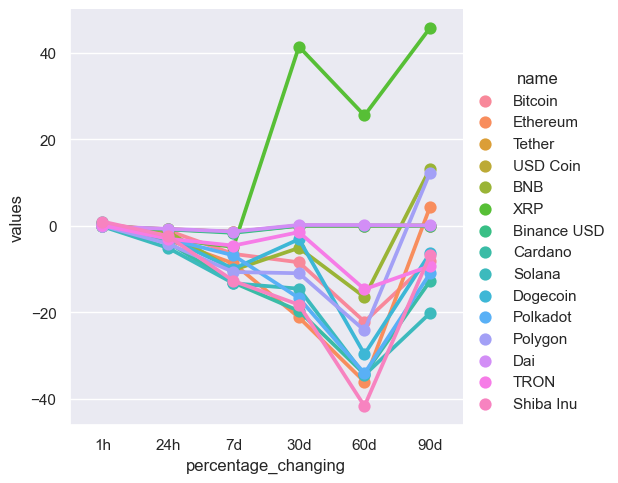

In [123]:
sns.catplot(x='percentage_changing', y='values', hue='name', data=change_df, kind='point')

In [125]:
#table to plot(in this case, I use Shiba Inu)

df_plot = df[['name','quote.IDR.price','timestamp']]
df_plot = df_plot.query("name == 'Shiba Inu'")
df_plot.reset_index(drop=True, inplace=True)
df_plot

,name,quote.IDR.price,timestamp
0,Shiba Inu,0.15373,2022-10-13 23:42:48.982203
1,Shiba Inu,0.15373,2022-10-13 23:43:04.231841
2,Shiba Inu,0.15384,2022-10-13 23:44:05.615190
3,Shiba Inu,0.15390,2022-10-13 23:45:06.797687
4,Shiba Inu,0.15436,2022-10-13 23:46:08.015180


<AxesSubplot:xlabel='timestamp', ylabel='quote.IDR.price'>

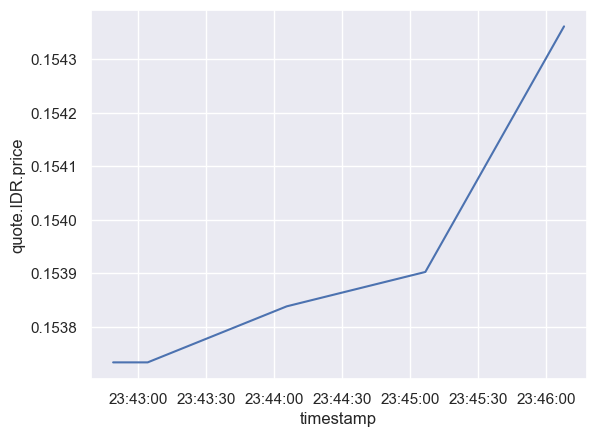

In [138]:
#plotting Shiba Inu Coin
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.IDR.price', data = df_plot)